# REGRESSÃO LINEAR ENEM 2019

Neste projeto realizaremos uma regressão linear com micro dados fornecidos pelo INEP no site https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem, de modo que encontremos padrões explicativos entre a média de notas e nossas outras features disponobilizadas no dataset.

O banco de dados utilizado será um recorte por estado que contém 500 observações com as seguintes variáveis:


* SG_UF_RESIDENCIA - Estado que o recorte foi feito
* NU_IDADE - Idade do candidato em anos
* TP_SEXO - Sexo biológico do candidato (F:feminino ou M:masculino)
* TP_ESTADO_CIVIL - Estado Civil do Candidato (1: Solteiro ou 2: Outros)
* TP_COR_RACA - (1: Branca/amarela ou 2:Preta/parda/indígena) 
* TP_ESCOLA - (1: Pública ou 2: Privada) 
* Q001 - Escolaridade do pai do Candidato (A: Fundamental, B: Médio, C: Superior ou D: Não informado)
* Q002 - Escolaridade da mãe do Candidato (A: Fundamental, B: Médio, C: Superior ou D: Não informado)
* Q005 - Quantas pessoas moram na mesma residência
* Q006 - A renda familiar Mensal (A: 1 SM, B: 1 a 2 SM, C:2 a 5 SM ou D: +5 SM)
* Q025 - Possuí acesso à internet em casa (A:Não, S:Sim)
* NU_MED - Nota média das provas

Portanto, o objetivo é **determinar quais fatores influenciam a nota média dos candidatos do ENEM.**

## importando Bibliotecas:

In [1]:
#bibliotecas para análise de Dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#importando bibliotecas do statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Explorando dados:

In [3]:
#lendo o arquivo CSV e salvando em dataframe pandas
enem = pd.read_csv('DF.csv')

In [4]:
#Exibindo primeiras linhas
enem.head()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ESCOLA,Q001,Q002,Q005,Q006,Q025,NU_MED
0,DF,44,F,1,2,1,D,A,5,B,B,404.38
1,DF,19,F,1,2,2,A,B,6,B,A,586.60
2,DF,17,M,1,1,2,C,C,4,D,B,734.80
3,DF,18,M,1,2,1,B,B,4,B,A,522.68
4,DF,18,M,1,2,1,A,B,5,C,B,378.92


In [5]:
#exibindo ultimas linhas
enem.tail()

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ESCOLA,Q001,Q002,Q005,Q006,Q025,NU_MED
495,DF,17,F,1,1,1,C,B,5,C,B,479.60
496,DF,18,M,2,1,1,C,C,4,C,B,595.78
497,DF,19,F,1,2,1,A,B,3,B,A,445.08
498,DF,18,M,1,2,1,B,B,3,C,B,430.02
499,DF,17,F,1,2,2,A,B,5,D,B,574.88


In [6]:
#exibindo 5 amostras aleatorias
enem.sample(5)

,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ESCOLA,Q001,Q002,Q005,Q006,Q025,NU_MED
345,DF,17,M,1,1,2,B,B,4,B,B,600.36
117,DF,18,F,1,2,1,D,B,2,C,B,451.32
351,DF,17,M,1,2,1,B,A,5,B,B,479.22
263,DF,17,F,1,1,1,B,A,4,A,B,527.52
437,DF,18,F,1,1,2,B,B,2,C,B,574.56


In [7]:
#Verificando informações do DB
enem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SG_UF_RESIDENCIA  500 non-null    object 
 1   NU_IDADE          500 non-null    int64  
 2   TP_SEXO           500 non-null    object 
 3   TP_ESTADO_CIVIL   500 non-null    int64  
 4   TP_COR_RACA       500 non-null    int64  
 5   TP_ESCOLA         500 non-null    int64  
 6   Q001              500 non-null    object 
 7   Q002              500 non-null    object 
 8   Q005              500 non-null    int64  
 9   Q006              500 non-null    object 
 10  Q025              500 non-null    object 
 11  NU_MED            500 non-null    float64
dtypes: float64(1), int64(5), object(6)
memory usage: 47.0+ KB


In [8]:
#contando valores nulos:
enem.isnull().sum()

SG_UF_RESIDENCIA    0
NU_IDADE            0
TP_SEXO             0
TP_ESTADO_CIVIL     0
TP_COR_RACA         0
TP_ESCOLA           0
Q001                0
Q002                0
Q005                0
Q006                0
Q025                0
NU_MED              0
dtype: int64

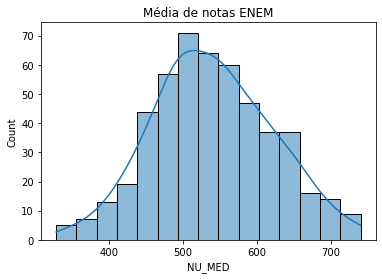

In [9]:
#verificando se existe distribuição normal na variavel target
sns.histplot(data=enem, x='NU_MED', kde=True)
plt.title('Média de notas ENEM');

In [10]:
#Exibindo informações sobre as variáveis numéricas:
enem.describe()

,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_ESCOLA,Q005,NU_MED
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,18.066000,1.028000,1.63600,1.268000,4.070000,539.945960
std,2.783728,0.165138,0.48163,0.443361,1.331407,80.683442
min,16.000000,1.000000,1.00000,1.000000,1.000000,328.700000
25%,17.000000,1.000000,1.00000,1.000000,3.000000,484.700000
50%,18.000000,1.000000,2.00000,1.000000,4.000000,537.140000
75%,18.000000,1.000000,2.00000,2.000000,5.000000,596.940000
max,48.000000,2.000000,2.00000,2.000000,11.000000,740.180000


## tratando dados

In [11]:
#Criando um novo db para fazer alteração mantendo o original
#realizando um loop para alterar todas as variáveis 'object' para 'category'
enemdb = enem.copy()
for i in enemdb.select_dtypes(include='object'):
    enemdb[i] = enemdb[i].astype('category')

In [12]:
#verificando dtypes novamente
enemdb.dtypes

SG_UF_RESIDENCIA    category
NU_IDADE               int64
TP_SEXO             category
TP_ESTADO_CIVIL        int64
TP_COR_RACA            int64
TP_ESCOLA              int64
Q001                category
Q002                category
Q005                   int64
Q006                category
Q025                category
NU_MED               float64
dtype: object

In [13]:
#descrevendo variáveis categóricas
enemdb.describe(include=['category'])

,SG_UF_RESIDENCIA,TP_SEXO,Q001,Q002,Q006,Q025
count,500,500,500,500,500,500
unique,1,2,4,4,4,2
top,DF,F,A,B,B,B
freq,500,277,179,199,154,448


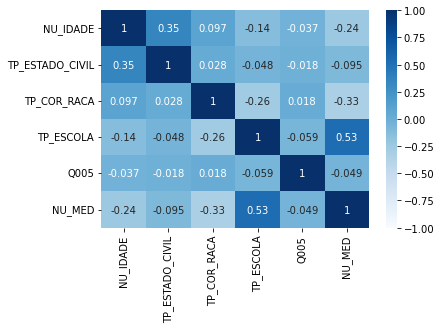

In [14]:
#criando uma matriz de correlação entre as variáveis numéricas do dataset.
sns.heatmap(data=enemdb.corr(),annot=True, vmin=-1, vmax=1, center=0, cmap='Blues');

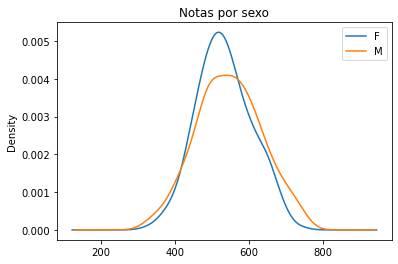

In [15]:
#Verificando a distribuição por sexo da média das notas
enemdb.groupby('TP_SEXO').NU_MED.plot(kind='kde', legend=True, title='Notas por sexo');

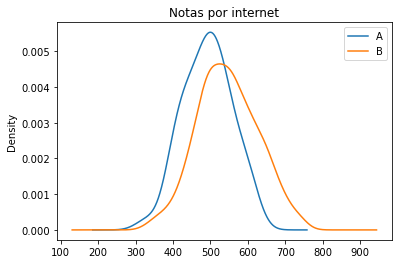

In [16]:
#Verificando a distribuição por ter ou não internet da média das notas
enemdb.groupby('Q025').NU_MED.plot(kind='kde', legend=True, title='Notas por internet');

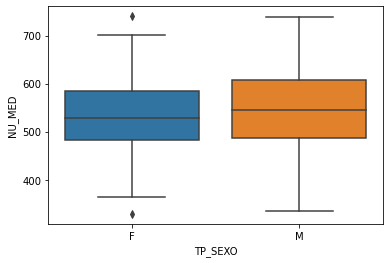

In [17]:
#boxplot para analisar sexo e nota
sns.boxplot(x ='TP_SEXO',y = 'NU_MED', data = enem);

In [18]:
#média das notas por sexo
enemdb.groupby('TP_SEXO').NU_MED.median()

TP_SEXO
F    529.0
M    545.7
Name: NU_MED, dtype: float64

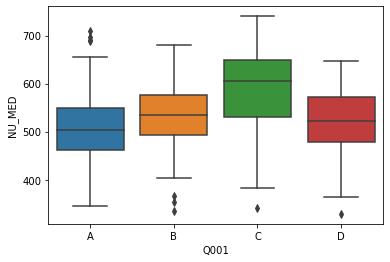

In [19]:
#boxplot da média das notas pela escolaridade do pai
sns.boxplot(x ='Q001',y = 'NU_MED', data = enemdb);

In [20]:
#calculando a média da média das notas do enem pela escolaridade do pai
enemdb.groupby('Q001').NU_MED.median()

Q001
A    502.82
B    533.80
C    604.40
D    522.93
Name: NU_MED, dtype: float64

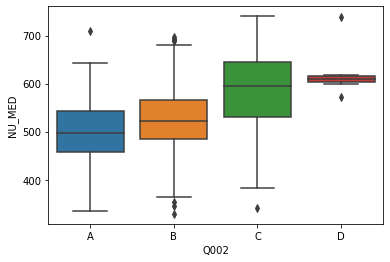

In [21]:
#média das notas por escolaridade da mãe
sns.boxplot(x ='Q002',y = 'NU_MED', data = enemdb);

In [22]:
#Calculando a média da média das notas no enem por escolaridade da mãe
enemdb.groupby('Q002').NU_MED.median()

Q002
A    497.83
B    523.08
C    595.20
D    609.51
Name: NU_MED, dtype: float64

O que entendemos dessas análises:


* As variáveis numéricas que mais possuem correlação com a média das notas(NU_MED) são TP_ESCOLA, NU_IDADE e TP_COR_RACA.
* A média de nota dos homens é mais alta do que das mulheres.
* A média de notas quando o pai possui ensino superior é mais alta, sendo mais baixa quando o pai possuí apenas o fundamental
* A média de notas quando a mãe não informa a escolaridade é mais alta, seguido do ensino superior e sendo mais baixa no fundamental

## Modelagem:

In [27]:
#Treinando o modelo com as variáveis com mais correlação e com a variável de renda média da família:
modelo1 = smf.ols(formula = 'NU_MED ~ C(TP_ESCOLA) + NU_IDADE + C(TP_COR_RACA) + Q006', 
                  data = enemdb)
modelo1_fit = modelo1.fit()
modelo1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 NU_MED   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     59.78
Date:                Fri, 22 Jul 2022   Prob (F-statistic):           1.63e-55
Time:                        20:42:55   Log-Likelihood:                -2767.6
No. Observations:                 500   AIC:                             5549.
Df Residuals:                     493   BIC:                             5579.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             575.3637     20.745     27.735      0.000     534.604     616.123
C(TP_ESCOLA)[T.2]      49.8112      7.838      6.355      0.000      34.411      65.211
C(TP_COR_RACA)[T.2]   -28.6712      6.007     -4.773      0.000     -40.474     -16.869
Q006[T.B]              20.3130      8.911      2.279      0.023       2.804      37.822
Q006[T.C]              32.7569      9.253      3.540      0.000      14.577      50.937
Q006[T.D]              78.1748     10.415      7.506      0.000      57.712      98.637
NU_IDADE               -3.7210      1.017     -3.659      0.000      -5.719      -1.723
==============================================================================
Omnibus:                        7.633   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                7.610
Skew:                          -0.262   Prob(JB):                       0.0223
Kurtosis:                       3.300   Cond. No.                         146.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Analisando Resíduos da regressão:

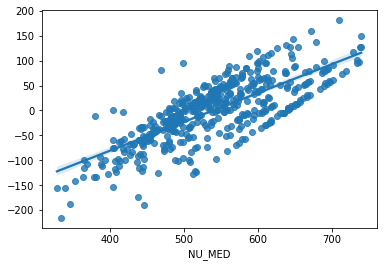

In [24]:
sns.regplot(x=enemdb.NU_MED , y=modelo1_fit.resid);

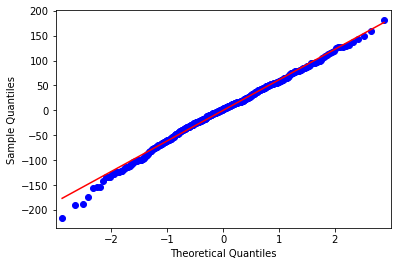

In [25]:
sm.qqplot(modelo1_fit.resid, line="s");

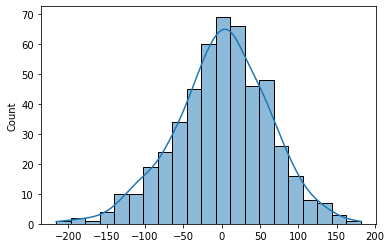

In [30]:
sns.histplot(modelo1_fit.resid, kde=True);

## Interpretação:

O modelo conseguiu chegar a explicação de aproximadamente 41% dá explicação do que compõem a nota do Enem de alunos do df a um nível de significância de 95%, comprovando a existência de linearidade entre as features e nosso targert.


Como Resultado temos:
* A nota média do aluno sobe aproximadamente 50 pontos caso seja aluno de escola particular
* A nota média do aluno cai em aproximadamente 29 pontos caso ele seja preto/pardo ou indígena
* A nota média do aluno aumenta conforme a renda mensal da família aumenta. Aproximadamente 20 pontos para 1 a 2 salários mínimos, Aproximadamente 33 pontos para 3 a 5 salários mínimos e Aproximadamente 78 pontos para acima de 5 salários mínimos.